<a href="https://colab.research.google.com/github/edwardoughton/spatial_computing/blob/main/9_01_Shortest_Path_Routing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shortest-Path Routing

Welcome to this class on shortest-path routing where we will be building on concepts learnt throughout the semester to work through some graph/network examples.

Today we will cover some basic introductory graph theory, followed by covering Kruskal's algorithm, eventually fitting our own minimum spanning tree.


## A Basic Intro to Graph Theory

Before we get into some code, we need to briefly cover some introductory terms and concepts.

Here, we treat a 'graph' as representing a set of relationships between objects. Think of a network of cities, with roads between them, each having a specific distance.

This field provides a mathematical framework for spatial problems by treating phenomena of interest as networks (e.g., a graph).

The nodes in the network are known as 'vertices', which are then linked by graph connections called 'edges' (so cities would be the vertices/nodes, and roads would be the edges in a transportation network).




Such an approach supports a wide variety of spatial computing applications pertaining to the modeling, analyzing, and solving of spatial problems. We have already covered in this class that understanding spatial relationships is central to spatial computing.

* A **graph** (G) consists of a set of **vertices** (V) and a set of **edges** (E). We are able to measure graph networks based on different properties, including (i) directed vs. undirected, (ii) connected vs. disconnected, and (iii) weighted vs. unweighted edges.
* Whether or not vertices are directly connected or not by an edge is referred to as **adjacency**. The degree of adjacency is symmetric in undirected graphs.
* When we have a sequence of vertices connected by edges, this is called a "path". This indicates a possible way to traverse from one vertex node to another, along a particular set of edges.


By way of an illustrative example, the figure below shows how a graph theory approach could be applied to a road network (Figures are credited to Wilson Chua, 2024).


In [25]:
from IPython.display import HTML
HTML('<img src="https://wilsoncwc.github.io/assets/2022-10-02-road-graph-neural-networks/primal_dual.png">')

Within graph theory, we have a variety of different types of graphs:

* **Undirected Graph**: Edges do not have a direction associated with them.
* **Directed Graph**: Edges do have a direction associated with them.
* **Weighted Graph**: Where each edge has an associated weight or cost (e.g., distance).

See the graphical example below of these three types of graphs (Figures are credited to Haque and Andrejevic, 2021):

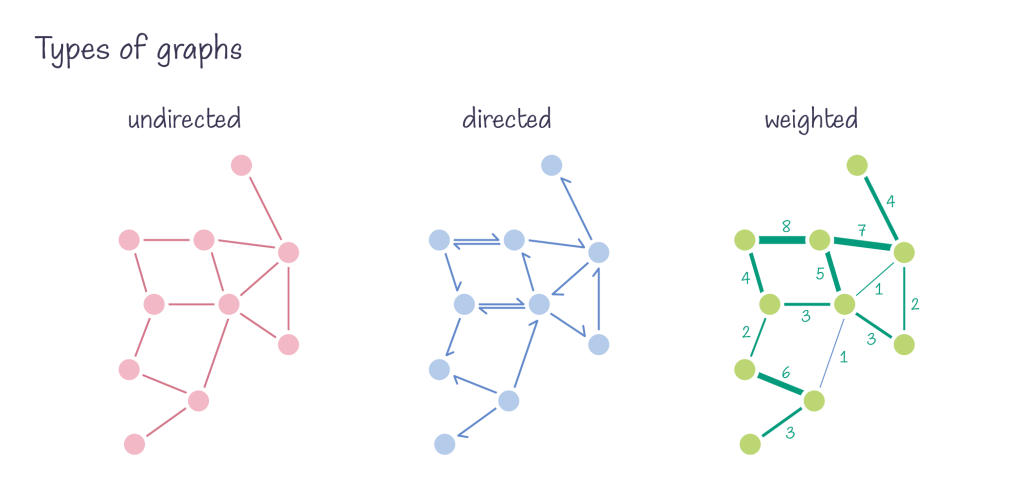

There are a range of algorithms which can be utilized to understand and traverse a graph.

Our focus today is understanding how these types of techniques can be used to support modern mapping software, especially the navigation tools embedded within your smartphone, as well as infrastructure planning approaches, as explored in our class tasks.

## Kruskal’s Minimum Spanning Tree (MST) Algorithm

A minimum spanning tree (MST) is a network graph with a weight less than, or equal to, the weight of every other possible graph specified between a set of nodes/vertices.

Here we will apply Kruskal's algorithm to find the MST for a connected, undirected graph.


## Our Objective

*To unify all nodes/vertices with the minimal edge weight, avoiding any cycles.*

Importantly, when we say "avoiding any cycles" in the context of graph algorithms, we mean ensuring that no sequence of edges forms a closed loop.

So if you start at a node and follow the selected edges, we do not want to return to a node without retracing an edge.

Take the example below, with the full graph on the left (e.g., a full road network). Next, we have a spanning tree in the middle (non-optimized path). Finally, on the right we have an MST providing the lowest total weight to connect all nodes/vertices.

(Figure credited to Terun Jain, 2022)

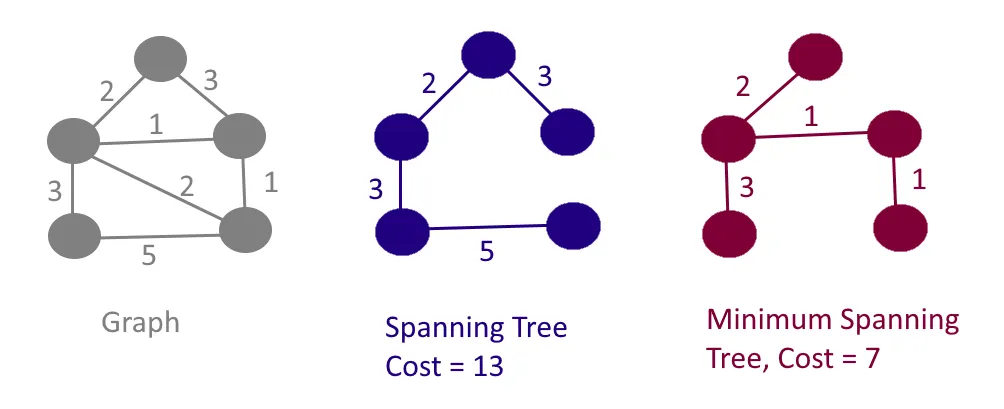

For the sake of this example, you can consider the weight of each edge as representing the distance to travel along a transportation network between locations (e.g., so the weight is a cost incurred, which we want to minimize).

Kruskal’s algorithm undertakes the following:

- Sort all edge links in ascending weight order.
- Pick the smallest edge.
- Check if it forms a cycle with the spanning tree formed so far.
- If the cycle is not formed, include this edge. Else, discard it.
- Repeat this process until there are (V-1) edges in the spanning tree.

See the input graph below containing 9 vertices and 14 edges. We expect the final spanning tree to consist of 8 edges.

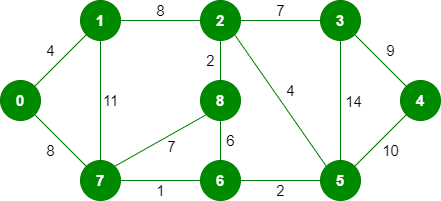

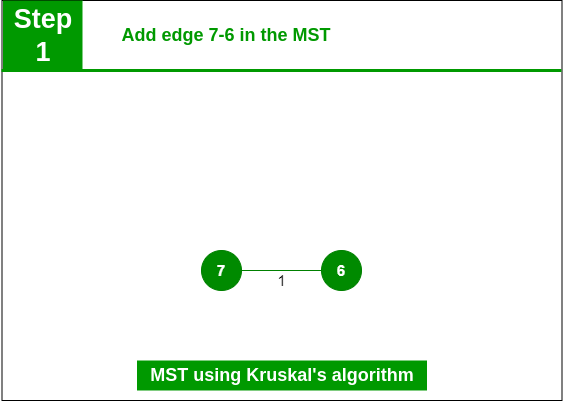

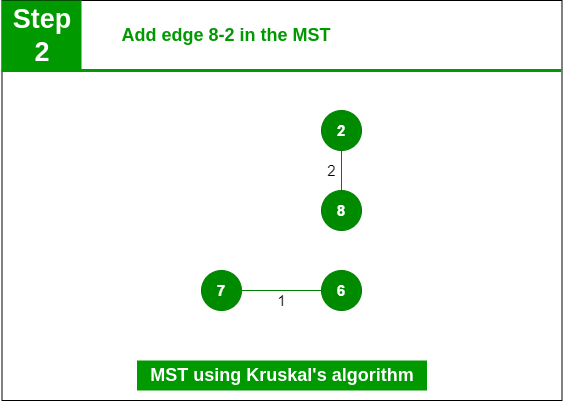

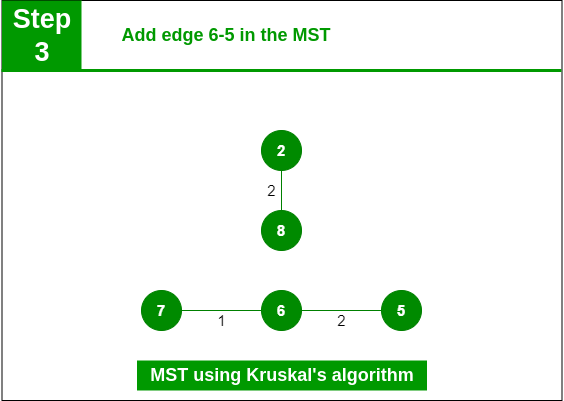

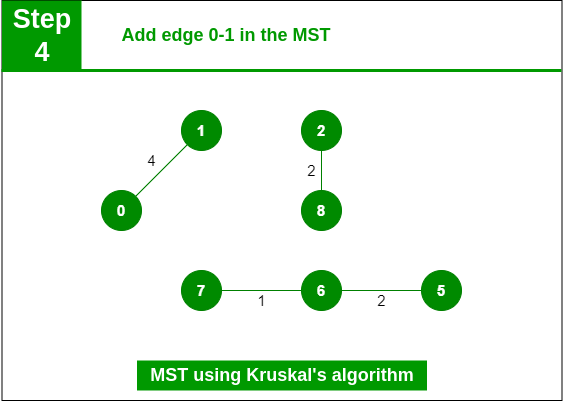

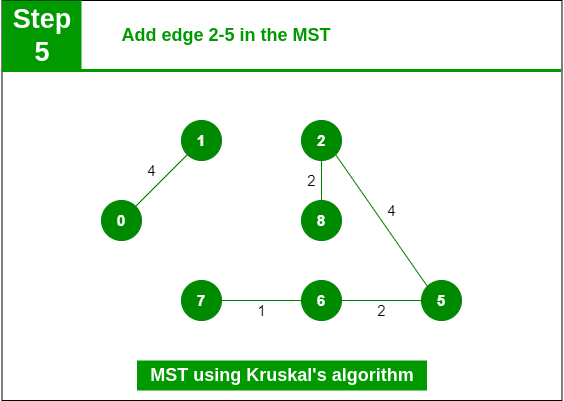

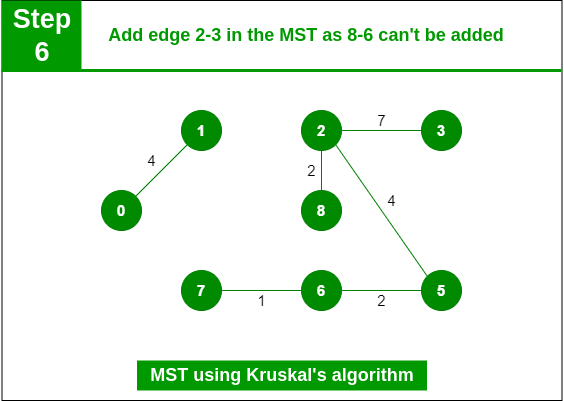

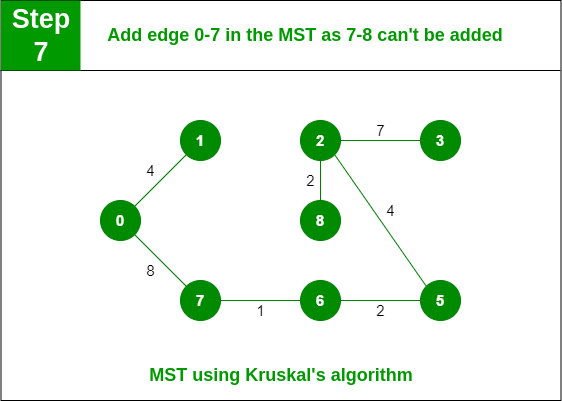

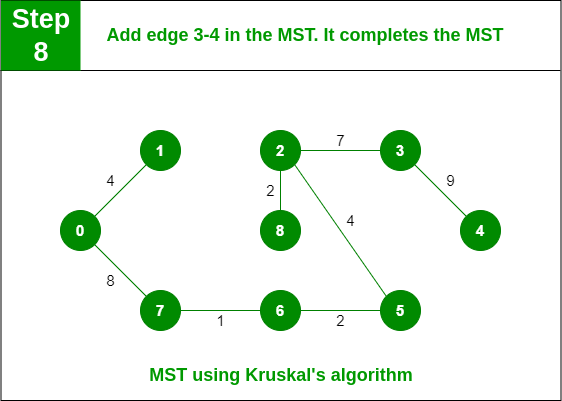

## Notation

The labels `u` and `v` are commonly used in graph theory and computer science to represent the source and destination nodes/vertices of an edge.

This convention originates from traditional mathematical notations used in graph theory and has been widely adopted in algorithm textbooks and literature.

Additionally, it is common to refer to the edge weight by `w`, which is important here as we want to approximate distance/cost via the weight parameter.

You will find this as common notation in other graph algorithms, including Dijkstra’s, Breadth-First Search (BFS), Depth-First Search (DFS) etc.





## Code example
Now let us get into some code to show how this plays out when utilizing the Python programing skills learnt in this class.

Our approach will have the following steps:

- Define our full data structure.
- Define our Union-Find (or Disjoint Set) function.
- Specify our Kruskal function to implement the algorithm.
- Obtain returned output.

Now we can begin by defining the full data structure as a source-destination pairing (essentially, a graph structure defined in code format).

In [77]:
# Example: Define the graph as an edge list (u, v, w)
# This equates to source,	destination, weight
edges = [
  (7,	6, 1),
  (8,	2, 2),
  (6,	5, 2),
  (0,	1, 4),
  (2,	5, 4),
  (8,	6, 6),
  (2,	3, 7),
  (7,	8, 7),
  (0,	7, 8),
  (1,	2, 8),
  (3,	4, 9),
  (5,	4, 10),
  (1,	7, 11),
  (3,	5, 14),
]
edges

[(7, 6, 1),
 (8, 2, 2),
 (6, 5, 2),
 (0, 1, 4),
 (2, 5, 4),
 (8, 6, 6),
 (2, 3, 7),
 (7, 8, 7),
 (0, 7, 8),
 (1, 2, 8),
 (3, 4, 9),
 (5, 4, 10),
 (1, 7, 11),
 (3, 5, 14)]

Next, we can create our Union-Find function to manage and merge groups of elements that belong to distinct sets.

The purpose here in Kruskal's algorithm is to determine if adding an edge would form a cycle (breaking a key MST property).

Suppose we have three nodes A, B and C with edges A-B, B-C, and C-A.

- Adding edges A-B and B-C, the graphic is still acyclic.
- Yet, adding C-A would form a cycle A-B-C-A, leading to a closed loop.
- To avoid a cycle in our MST we need to exclude C-A.

By defining the following `Union-Find` function we can avoid this outcome.

In [100]:
# Example: Defining our Union-Find class
class UnionFind:
    def __init__(self, n):
        """
        Initializes a Union-Find (Disjoint Set) data structure.

        Parameters
        ----------
        n : int
            The number of elements in the Union-Find structure.
        """
        self.parent = list(range(n))
        self.rank = [0] * n

    def find(self, u):
        """
        Finds the root of the node `u` with path compression.

        Parameters
        ----------
        u : int
            The node whose root we are searching for.

        Returns
        -------
        int
            The root of the node `u`.
        """
        if self.parent[u] != u:
            self.parent[u] = self.find(self.parent[u])
        return self.parent[u]

    def union(self, u, v):
        """
        Unites two sets containing nodes/vertices `u` and `v`, using union
        by rank.

        Parameters
        ----------
        u : int
            The first node to union.
        v : int
            The second node to union.

        """
        root_u = self.find(u)
        root_v = self.find(v)

        if root_u != root_v:
            if self.rank[root_u] > self.rank[root_v]:
                self.parent[root_v] = root_u
            elif self.rank[root_u] < self.rank[root_v]:
                self.parent[root_u] = root_v
            else:
                self.parent[root_v] = root_u
                self.rank[root_u] += 1

# Instantiate our class
uf = UnionFind(10)
uf

Some comments on this `UnionFind` function:

- The `find` method helps us identify the root of a node's set, indicating the connected component. This helps us avoid cycling.
- The `union` method enables the merging of two sets into one, for example, connecting two previously unconnected nodes/sets.


Next, we are able to specify our Kruskal function to implement the algorithm.

In [101]:
# Example: Define Kruskal's
def kruskal(edges, num_vertices):
    """
    Finds the Minimum Spanning Tree (MST) of a connected, undirected graph
    using Kruskal's algorithm.

    Parameters
    ----------
    edges : list of tuples
        A list of edges in the graph, where each edge is represented
        as a tuple (u, v, weight), with `u` and `v` being the connected
        nodes and `weight` the weight of the edge.
    num_vertices : int
        The number of vertices in the graph.

    Returns
    -------
    tuple of (list, int)
        A tuple containing:
        - `mst` (list of tuples): The edges in the Minimum Spanning Tree,
        where each edge is represented as (u, v, weight).
        - `mst_weight` (int): The total weight of the Minimum Spanning Tree.
    """
    # Sort all edge links in non-decreasing weight order.
    # Here we are sorting using a lambda function on the weight x[2]
    edges.sort(key=lambda x: x[2])

    # Set up our union find algorithm to ensure we avoid cycles.
    uf = UnionFind(num_vertices)

    mst = []
    mst_weight = 0

    # Loop over our sorted edges
    for u, v, weight in edges:
        # Check if u and v are in the same set
        if uf.find(u) != uf.find(v):
            uf.union(u, v)
            # if not to our output list
            mst.append((u, v, weight))
            # and add the weight
            mst_weight += weight

    return mst, mst_weight # Return the mst and weight

And now we have specified our functions/classes, we can generate results.

Here we need the edges, number of vertices, and the `kruskal` function and `UnionFind` class.

In [104]:
# Example: Run Kruskal's Algorithm
num_vertices = 10
mst, mst_weight = kruskal(edges, num_vertices)
print(mst)

[(7, 6, 1), (8, 2, 2), (6, 5, 2), (0, 1, 4), (2, 5, 4), (2, 3, 7), (0, 7, 8), (3, 4, 9)]


The output we have obtained should match up with the graphical explanation illustrated earlier in this class.

Next, we can interrogate the edge properties of the MST define:

In [103]:
# Example: Display the result
print("Edges in the Minimum Spanning Tree:")
for u, v, weight in mst:
    print(f"({u}, {v}) - Weight: {weight}")
print(f"Total weight of MST: {mst_weight}")

Edges in the Minimum Spanning Tree:
(7, 6) - Weight: 1
(8, 2) - Weight: 2
(6, 5) - Weight: 2
(0, 1) - Weight: 4
(2, 5) - Weight: 4
(2, 3) - Weight: 7
(0, 7) - Weight: 8
(3, 4) - Weight: 9
Total weight of MST: 37


In [32]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/JZBQLXgSGfs?si=cBUswiVWRNaai3qm" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>')


/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [ ]:
<iframe width="560" height="315" src="https://www.youtube.com/embed/EFg3u_E6eHU?si=38RtZ8Mn_AW5Wrb3" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

## Working With Real Data

We can begin by loading in the `botswana_settlements.shp` data, which you can download from the GitHub, followed by unzipping.



In [106]:
from google.colab import files
files.upload()

Saving botswana_settlements.cpg to botswana_settlements.cpg
Saving botswana_settlements.dbf to botswana_settlements.dbf
Saving botswana_settlements.prj to botswana_settlements.prj
Saving botswana_settlements.qmd to botswana_settlements.qmd
Saving botswana_settlements.shx to botswana_settlements.shx


{'botswana_settlements.cpg': b'UTF-8',
 'botswana_settlements.dbf': b'\x03|\x04\x01\x0c\x00\x00\x00\x01\x01K\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00id\x00\x00\x00\x00\x00\x00\x00\x00\x00N\x00\x00\x00\x00\x12\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00GID_0\x00\x00\x00\x00\x00\x00C\x00\x00\x00\x00P\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00GID_2\x00\x00\x00\x00\x00\x00C\x00\x00\x00\x00P\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00population\x00N\x00\x00\x00\x00\x18\x0f\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00type\x00\x00\x00\x00\x00\x00\x00C\x00\x00\x00\x00P\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00lon\x00\x00\x00\x00\x00\x00\x00\x00N\x00\x00\x00\x00\x18\x0f\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00lat\x00\x00\x00\x00\x00\x00\x00\x00N\x00\x00\x00\x00\x18\x0f\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\r                  2BWA              

We can now load in our node data for selected settlements in Botswana.

Please also take a moment to view the data in a piece of GIS software, e.g., QGIS.

In [152]:
# Example: Load in our node data
import geopandas as gpd
from shapely.geometry import Point as shapely_point, LineString as shapely_linestring

# Load in using geopandas
nodes = gpd.read_file('botswana_settlements.shp', crs='epsg:4326')

# Convert to projected crs
nodes = nodes.to_crs('epsg:3857')
print(nodes.head(3)) # inspect geodataframe

# Convert our geodataframe to a list of dictionaries
nodes = nodes.to_dict('records')
print(len(nodes))
print(nodes[0]) # inspect first dict

   id GID_0      GID_2    population    type       lon       lat  \
0   2   BWA  BWA.1.3_1  48375.335937    >20k  27.16555 -23.11843   
1   7   BWA  BWA.1.8_1     45.099712  <0.25k  25.94375 -20.06625   
2   7   BWA  BWA.1.8_1     37.008595  <0.25k  26.50684 -20.43154   

                           geometry  
0  POINT (3024055.289 -2646346.907)  
1  POINT (2888045.029 -2280880.769)  
2  POINT (2950727.725 -2324223.904)  
12
{'id': 2, 'GID_0': 'BWA', 'GID_2': 'BWA.1.3_1', 'population': 48375.33593749999, 'type': '>20k', 'lon': 27.16555, 'lat': -23.11843, 'geometry': <POINT (3024055.289 -2646346.907)>}


/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:198: RuntimeWarning: driver ESRI Shapefile does not support open option CRS
  return ogr_read(


Next, we can specify all the possible edges in our network, creating a fully connected graph (e.g., connecting each node to all other nodes).

We will write these out as `my_edges.shp` so that you can view these in your GIS software.

We require this step to enable the mst algorithm to find the shortest path.

In [154]:
# Example create a fully connected graph
my_edges = []

for item1 in nodes:
  for item2 in nodes:
    if item1['id'] != item2['id']:
      line = shapely_linestring([item1['geometry'], item2['geometry']])
      my_edges.append({
          'geometry': line,
          'properties': {
            'from': item1['id'],
            'to': item2['id'],
            'length': line.length
          }
      })

edges = gpd.GeoDataFrame.from_features(my_edges, crs='epsg:3857')
edges = edges.to_crs('epsg:4326')
edges.to_file('my_edges.shp')

print(len(edges))

124


Finally, we can utilize `NetworkX` to fit a minimum spanning tree, thanks to its handy `.minimum_spanning_edges()` function.

`NetworkX` provides a range of useful tools for creating, manipulating, and studying complex networks or graphs (including algorithms visualization capabilities etc.).

This `.minimum_spanning_edges()` function will iterate across all possible paths in the network that connect all points, and then rank these options, selecting the shortest distance instance as the minimum spanning tree.

In [157]:
# Example: Fit our minimum spanning tree
import networkx as nx

G = nx.Graph()

for node_id, node in enumerate(nodes):
    G.add_node(node_id, object=node)

for edge in my_edges:
    G.add_edge(edge['properties']['from'], edge['properties']['to'],
        object=edge, weight=edge['properties']['length'])

tree = nx.minimum_spanning_edges(G)
print(tree) # inspect networkx generator object
print(list(tree)) #inspect underlying data structure

<generator object kruskal_mst_edges at 0x7c62695aff40>
[(10, 16, {'object': {'geometry': <LINESTRING (2930295.494 -2776345.817, 2886639.429 -2829036.104)>, 'properties': {'from': 16, 'to': 10, 'length': 68426.00634555693}}, 'weight': 68426.00634555693}), (10, 27, {'object': {'geometry': <LINESTRING (2820176.259 -2858399.687, 2886639.429 -2829036.104)>, 'properties': {'from': 27, 'to': 10, 'length': 72660.66955598944}}, 'weight': 72660.66955598944}), (7, 9, {'object': {'geometry': <LINESTRING (3060986.718 -2412976.519, 2950727.725 -2324223.904)>, 'properties': {'from': 9, 'to': 7, 'length': 141541.76851955632}}, 'weight': 141541.76851955632}), (11, 14, {'object': {'geometry': <LINESTRING (2557712.627 -2747979.326, 2471076.233 -2615449.089)>, 'properties': {'from': 14, 'to': 11, 'length': 158335.49377697895}}, 'weight': 158335.49377697895}), (2, 16, {'object': {'geometry': <LINESTRING (2930295.494 -2776345.817, 3024055.289 -2646346.907)>, 'properties': {'from': 16, 'to': 2, 'length': 160

To export our minimum spanning tree, we will convert our tree from the format which `NetworkX` creates (source, sink, geometry), into a list of dictionaries, utilizing the geojson format.

We can then easily export this using `GeoPandas`.

In [161]:
# Example: Fit and export our minimum spanning tree
import networkx as nx

G = nx.Graph()

for node_id, node in enumerate(nodes):
    G.add_node(node_id, object=node)

for edge in my_edges:
    G.add_edge(edge['properties']['from'], edge['properties']['to'],
        object=edge, weight=edge['properties']['length'])

tree = nx.minimum_spanning_edges(G)
# print(tree) # inspect networkx generator object
# print(list(tree)) #inspect underlying data structure

mst = []

# Convert our networkx mst into a geojson list of dicts
for source, sink, geojson in tree:
    if geojson['object']['properties']['length'] > 0:
        mst.append({
          'geometry': geojson['object']['geometry'],
          'properties': geojson['object']['properties']
        })
    else:
      print(source, sink, geojson)

# Create geodataframe
edges = gpd.GeoDataFrame.from_features(mst, crs='epsg:3857')

# # Convert crs to export in 3857
# edges['geometry'].set_crs('epsg:3857')

# Convert crs to export in 4326
edges = edges.to_crs('epsg:4326')

# Export to .shp file
edges.to_file('minimum_spanning_tree.shp')

Inspect the resulting files within your GIS software and think critically about the implications of using method.

Consider the range of uses within your own field of research, from routing users through to planning new infrastructure (e.g., roads, fiber optic links etc.).

## Task 1

Go find the `botswana_settlements_task.zip` file from the GitHub.

With this larger set of settlements, try to find a minimum spanning tree to connect all these nodes.

Once you have your results, think critically about how you could improve this.

Do you have the most cost-efficient network?

What could you do to reduce distance travelled/cost?


In [ ]:
# Enter your attempt below


## Task 2

Now find your own set of nodes, such as OSM Points of Interest (PoIs), building centroids, electricity infrastructure etc. and fit a minimum spanning tree.

Prior to exporting your results, make sure you have the distance of each link, so that you can estimate the total distance covered in kilometers.

In [ ]:
# Enter your attempt below
